In [1]:
#IMPORTAMOS LAS LIBRERIAS A UTILIZAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#CODIGO PARA CARGA DE ARCHIVOS A GOOGLE COLAB
from google.colab import files
uploaded = files.upload()


In [13]:
#LECTURA DE ARCHIVOS CSV
cundinamarca = pd.read_csv('/content/Vista_Casos_Positivos_COVID-19_Cundinamarca.csv')
antioquia = pd.read_csv('/content/Casos_positivos_de_Covid-19_en_el_departamento_de_Antioquia.csv')
cesar = pd.read_csv('/content/Casos_positivos_de_COVID-19_en_el_Departamento_del_Cesar.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
#CONCATENACIÓN DE LAS FUENTES DE DATOS
new_df=pd.concat([cundinamarca, cesar, antioquia])

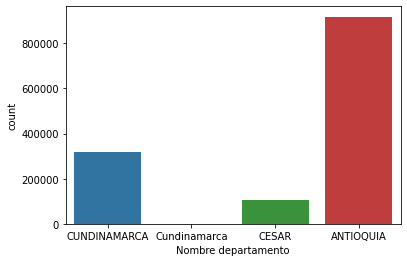

In [15]:
#USO DE LA LIBRERIA SEABORN PARA VER LOS DATOS Y SUS INCONSISTENCIAS
sns.countplot(x='Nombre departamento', data=new_df)

In [16]:
#REVISAMOS LOS VALORES QUE CONTENGAN LA CADENA DE TEXTO INDICADA
dpto_data = new_df['Nombre departamento'].str.contains('Cund', case = False)
dpto_data


0          True
1          True
2          True
3          True
4          True
          ...  
918277    False
918278    False
918279    False
918280    False
918281    False
Name: Nombre departamento, Length: 1342979, dtype: bool

In [17]:
#REEMPLAZAMOS LOS DATOS CON LA CADENA DE TEXTO INDICADA
new_df['Nombre departamento'] = np.where(dpto_data, 'CUNDINAMARCA',new_df['Nombre departamento'])


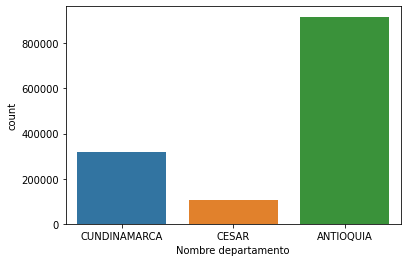

In [18]:
sns.countplot(x='Nombre departamento', data=new_df)

In [19]:
#ELEIMINAMOS LAS CONLUMNAS QUE NO SE REQUIEREN
new_df=new_df.drop(["Unidad de medida de edad","Nombre del grupo étnico","Código DIVIPOLA departamento","Código DIVIPOLA municipio","Código ISO del país","ID de caso","fecha reporte web","Fecha de inicio de síntomas","Fecha de diagnóstico","Pertenencia étnica", "Nombre del país", "Nombre municipio", "Fecha de muerte", "Fecha de recuperación"],axis=1)

In [20]:
#CONSULTAMOS LAS FILAS DE LAS COLUMNAS QUE TENGAN DATOS NULOS
new_df.isnull().sum()

Fecha de notificación        0
Nombre departamento          0
Nombre municipio             0
Edad                         0
Sexo                         0
Tipo de contagio             0
Ubicación del caso        5294
Estado                    5294
Recuperado                4498
Tipo de recuperación     33400
dtype: int64

In [21]:
#LIMPIEZA EN LOS DATOS PARA REEMEPLAZAR VALORES NULOS POR EL TEXTO INDICADO
new_df["Ubicación del caso"].fillna("No registra", inplace = True)
new_df


,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Tipo de recuperación
0,2020-08-27 00:00:00,CUNDINAMARCA,ZIPAQUIRA,7,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
1,2020-08-27 00:00:00,CUNDINAMARCA,SIBATE,25,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
2,2020-08-27 00:00:00,CUNDINAMARCA,FUNZA,58,F,Comunitaria,Fallecido,Fallecido,Fallecido,NaN
3,2021-02-04 00:00:00,CUNDINAMARCA,FUNZA,33,M,Relacionado,Casa,Leve,Recuperado,Tiempo
4,2021-02-04 00:00:00,CUNDINAMARCA,GIRARDOT,59,F,Comunitaria,Casa,Leve,Recuperado,Tiempo
...,...,...,...,...,...,...,...,...,...,...
918277,2022-01-31 00:00:00,ANTIOQUIA,MEDELLIN,47,M,En estudio,Casa,Leve,Recuperado,Tiempo
918278,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,35,M,En estudio,Casa,Leve,Recuperado,Tiempo
918279,2022-02-01 00:00:00,ANTIOQUIA,ITAGUI,65,F,En estudio,Casa,Leve,Recuperado,Tiempo
918280,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,39,F,En estudio,Casa,Leve,Recuperado,Tiempo


In [22]:
new_df["Recuperado"].fillna("No registra", inplace = True)
new_df


,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Tipo de recuperación
0,2020-08-27 00:00:00,CUNDINAMARCA,ZIPAQUIRA,7,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
1,2020-08-27 00:00:00,CUNDINAMARCA,SIBATE,25,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
2,2020-08-27 00:00:00,CUNDINAMARCA,FUNZA,58,F,Comunitaria,Fallecido,Fallecido,Fallecido,NaN
3,2021-02-04 00:00:00,CUNDINAMARCA,FUNZA,33,M,Relacionado,Casa,Leve,Recuperado,Tiempo
4,2021-02-04 00:00:00,CUNDINAMARCA,GIRARDOT,59,F,Comunitaria,Casa,Leve,Recuperado,Tiempo
...,...,...,...,...,...,...,...,...,...,...
918277,2022-01-31 00:00:00,ANTIOQUIA,MEDELLIN,47,M,En estudio,Casa,Leve,Recuperado,Tiempo
918278,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,35,M,En estudio,Casa,Leve,Recuperado,Tiempo
918279,2022-02-01 00:00:00,ANTIOQUIA,ITAGUI,65,F,En estudio,Casa,Leve,Recuperado,Tiempo
918280,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,39,F,En estudio,Casa,Leve,Recuperado,Tiempo


In [23]:
new_df["Tipo de recuperación"].fillna("No registra", inplace = True)
new_df


,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Tipo de recuperación
0,2020-08-27 00:00:00,CUNDINAMARCA,ZIPAQUIRA,7,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
1,2020-08-27 00:00:00,CUNDINAMARCA,SIBATE,25,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
2,2020-08-27 00:00:00,CUNDINAMARCA,FUNZA,58,F,Comunitaria,Fallecido,Fallecido,Fallecido,No registra
3,2021-02-04 00:00:00,CUNDINAMARCA,FUNZA,33,M,Relacionado,Casa,Leve,Recuperado,Tiempo
4,2021-02-04 00:00:00,CUNDINAMARCA,GIRARDOT,59,F,Comunitaria,Casa,Leve,Recuperado,Tiempo
...,...,...,...,...,...,...,...,...,...,...
918277,2022-01-31 00:00:00,ANTIOQUIA,MEDELLIN,47,M,En estudio,Casa,Leve,Recuperado,Tiempo
918278,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,35,M,En estudio,Casa,Leve,Recuperado,Tiempo
918279,2022-02-01 00:00:00,ANTIOQUIA,ITAGUI,65,F,En estudio,Casa,Leve,Recuperado,Tiempo
918280,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,39,F,En estudio,Casa,Leve,Recuperado,Tiempo


In [24]:
new_df["Estado"].fillna("No registra", inplace = True)
new_df


,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Tipo de recuperación
0,2020-08-27 00:00:00,CUNDINAMARCA,ZIPAQUIRA,7,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
1,2020-08-27 00:00:00,CUNDINAMARCA,SIBATE,25,M,Comunitaria,Casa,Leve,Recuperado,Tiempo
2,2020-08-27 00:00:00,CUNDINAMARCA,FUNZA,58,F,Comunitaria,Fallecido,Fallecido,Fallecido,No registra
3,2021-02-04 00:00:00,CUNDINAMARCA,FUNZA,33,M,Relacionado,Casa,Leve,Recuperado,Tiempo
4,2021-02-04 00:00:00,CUNDINAMARCA,GIRARDOT,59,F,Comunitaria,Casa,Leve,Recuperado,Tiempo
...,...,...,...,...,...,...,...,...,...,...
918277,2022-01-31 00:00:00,ANTIOQUIA,MEDELLIN,47,M,En estudio,Casa,Leve,Recuperado,Tiempo
918278,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,35,M,En estudio,Casa,Leve,Recuperado,Tiempo
918279,2022-02-01 00:00:00,ANTIOQUIA,ITAGUI,65,F,En estudio,Casa,Leve,Recuperado,Tiempo
918280,2022-01-26 00:00:00,ANTIOQUIA,MEDELLIN,39,F,En estudio,Casa,Leve,Recuperado,Tiempo


In [25]:
#CONSULTAMOS NUEVAMENTE PARA VALIDAR QUE YA NO EXISTAN DATOS NULOS
new_df.isnull().sum()

Fecha de notificación    0
Nombre departamento      0
Nombre municipio         0
Edad                     0
Sexo                     0
Tipo de contagio         0
Ubicación del caso       0
Estado                   0
Recuperado               0
Tipo de recuperación     0
dtype: int64

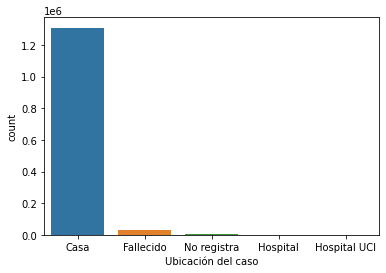

In [29]:
 #CONSULTAMOS LAS COLUMNAS BUSCANDO VALORES QUE SE DEBAN LIMPIAR
 sns.countplot(x='Ubicación del caso', data=new_df)

In [27]:
ubicacion_data = new_df['Ubicación del caso'].str.contains('cas', case = False)
new_df['Ubicación del caso'] = np.where(ubicacion_data, 'Casa', new_df['Ubicación del caso'])


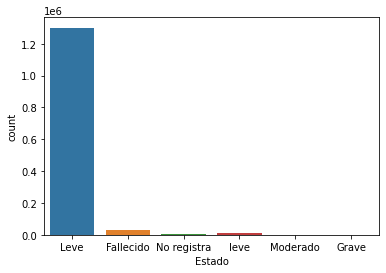

In [30]:
sns.countplot(x='Estado', data=new_df)

In [31]:
estado_data = new_df['Estado'].str.contains('lev', case = False)
new_df['Estado'] = np.where(estado_data, 'Leve', new_df['Estado'])


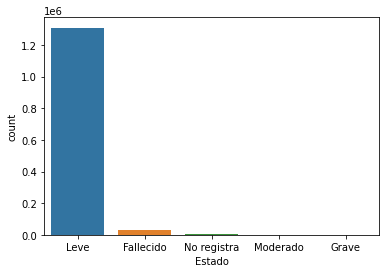

In [32]:
sns.countplot(x='Estado', data=new_df)

In [37]:
#AGREGAMOS UNA NUEVA COLUMNA LLAMADA COLOMBIA CON VALOR COLOMBIA PARA POSTERIORMENTE EN DATA STUDIO GENERAR UN MAPA
new_df["PAIS"]="COLOMBIA"

In [38]:
#INSTALAMOS GOOGLE.AUTH PARA AUTENTICARNOS CON EL CORREO
!pip install google.auth==1.7.2

     |████████████████████████████████| 74 kB 2.4 MB/s 
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
  Attempting uninstall: google.auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires cachetools>=4.2.1, but you have cachetools 3.1.1 which is incompatible.
pydata-google-auth 1.4.0 requires google-auth<3.0dev,>=1.25.0; python_version >= "3.6", but you have google-auth 1.7.2 which is incompatible.
google-colab 1.0.0 requires google-auth>=1.17.2, but you

In [39]:
#IMPORTAMOS GOOGLE COLAB
from google.colab import auth

In [40]:
#REALIZAMOS LA AUTENTICACION CON EL CORREO DE GOOGLE
auth.authenticate_user()
print('Authenticated')


Authenticated


In [41]:
#IMPORTAMOS LA LIBRERIA BIGQUERY PARA CARGAR NUESTROS DATOS
from google.cloud import bigquery

In [43]:
project_id = 'lyrical-chassis-277918' #ID DEL PROYECTO DE BIGQUERY
client = bigquery.Client(project = project_id)

table_id = "lyrical-chassis-277918.pruebas.Covid"# ID DE LA TABLA CREADA EN BIGQUERY
table_schema = []

# Trabajo de carga

job_config = bigquery.LoadJobConfig(
    schema=table_schema,
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE,
)



In [44]:
#PROCESO DE CARGUE EN BIGQUERY
load_job = client.load_table_from_dataframe(
    new_df, table_id, job_config=job_config
) 

load_job.result() 
destination_table = client.get_table(table_id) 


/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning: Unable to determine type of column 'Fecha de notificación'.
  warnings.warn(u"Unable to determine type of column '{}'.".format(column))
